In [6]:
# importar bibliotecas necessárias
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier



from   sklearn.metrics import r2_score
import statsmodels.api as sm

scores = pd.read_csv("..\\dados\\selecao_final.csv",sep=';')
X = scores.drop(["Gain/Loss", "Gain","Set",'SubjID','Choice',"GameID","Amb","Corr", "Payoff", "Forgone", "Apay", "Bpay", "block","RT","BiasedOption"], axis=1).select_dtypes(exclude=['object'])
X.head()

,Gender,Age,HighValue,pHighValue,LowValue,LotNum,Order,Trial,Feedback,EV,Loss
0,1,26,-3,1.0,-3,1,19,1,0,-3.0,0
1,1,26,-3,1.0,-3,1,19,2,0,-3.0,0
2,1,26,-3,1.0,-3,1,19,3,0,-3.0,0
3,1,26,-3,1.0,-3,1,19,4,0,-3.0,0
4,1,26,-3,1.0,-3,1,19,5,0,-3.0,0


In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = X['Loss']

train_data, test_data, train_labels, test_labels = train_test_split(X_scaled, y, train_size=0.8, random_state=3)

independent_vars = ["Gender", "HighValue", "pHighValue", "LowValue", "Trial",  "Order", "Age", "EV", "LotNum", "Feedback"] # "Feedback"
X_train = train_data[:, [X.columns.get_loc(col) for col in independent_vars]]
X_test = test_data[:, [X.columns.get_loc(col) for col in independent_vars]]

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, train_labels)


In [8]:
# instanciar o modelo XGBoost
model = XGBRegressor()

# chamar o fit para o modelo
model.fit(X_train_resampled, y_train_resampled)

# fazer previsões em cima do dataset de teste
predictions = model.predict(X_test)

print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, test_labels)))

Erro Médio Absoluto: 0.21


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
predictions_int=[]

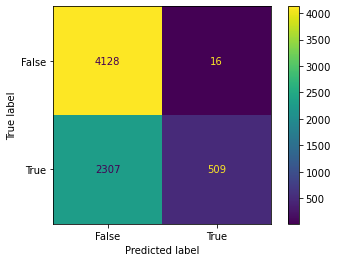

In [9]:
predictions_int = np.asarray(predictions, dtype = 'int')

confusion_matrix = metrics.confusion_matrix(test_labels, predictions_int)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
test_y

In [ ]:
predictions_int